In [1]:
from dotenv import dotenv_values
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.tsa.api import VAR
# Internal imports.

from utils import (
    format_millions,
    get_state_population,
)

In [2]:
DATA_DIR = '../.datasets'

In [3]:
filename = f'{DATA_DIR}/oklahoma/ok_revenue_forecast_2021-06-02.xlsx'
past_forecast_data = pd.read_excel(filename, index_col=0)
past_forecast = past_forecast_data.revenue_forecast[-6:]

In [4]:
past_forecast_data

,excise_tax,total_revenue,revenue_forecast
date,,,
2020-07-01,5529722.0,7.899603e+07,NaN
2020-08-01,10767124.0,1.538161e+08,NaN
2020-09-01,16256823.0,2.322403e+08,NaN
2020-10-01,21592871.0,3.084696e+08,NaN
2020-11-01,26843058.0,3.834723e+08,NaN
2020-12-01,31659626.0,4.522804e+08,NaN
2021-01-01,36756588.0,5.250941e+08,NaN
2021-02-01,41979611.0,5.997087e+08,NaN
2021-03-01,47448462.0,6.778352e+08,NaN


AttributeError: 'Series' object has no attribute 'revenue_forecast'

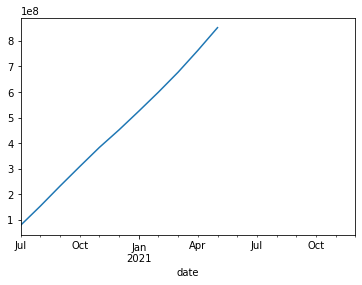

In [5]:
past_forecast_data.total_revenue.plot()
past_forecast.revenue_forecast.plot()

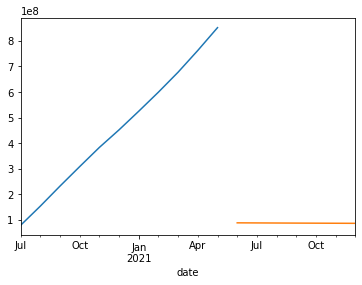

In [6]:
past_forecast_data.total_revenue.plot()
past_forecast_data.revenue_forecast.plot()

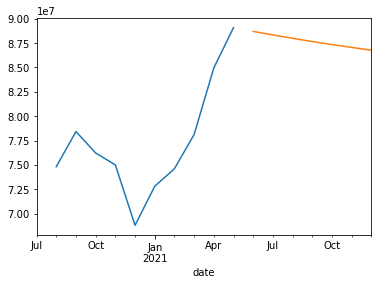

In [7]:
past_forecast_data.total_revenue.diff().plot()
past_forecast_data.revenue_forecast.plot()

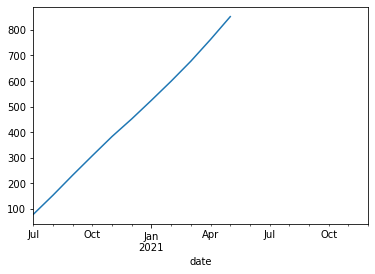

In [8]:
(past_forecast_data.total_revenue / 1_000_000).plot()

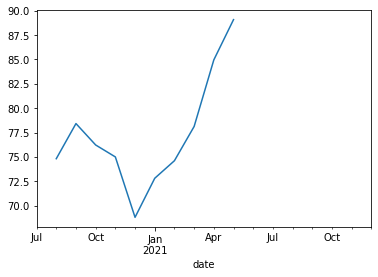

In [9]:
(past_forecast_data.total_revenue.diff() / 1_000_000).plot()

In [10]:
2_000_000_000 / 12

166666666.66666666

In [11]:
2_000_000_000 / 12 / 1_000_000

166.66666666666666

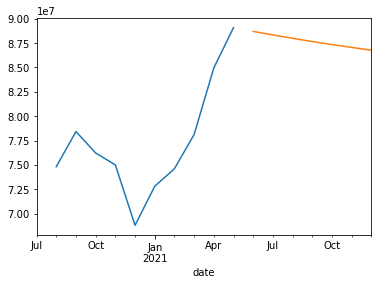

In [12]:
past_forecast_data.total_revenue.diff().plot()
past_forecast_data.revenue_forecast.plot()

In [13]:
patient_data = pd.read_excel(f'{DATA_DIR}/oklahoma/patient_data.xlsx', index_col=0)

In [14]:
patient_data

,patients,sq788_tax
date,,
2020-01-01,235786,3271492
2020-02-01,247190,3319612
2020-03-01,258308,3422784
2020-04-01,271979,4301520
2020-05-01,282511,5168990
2020-06-01,297010,5529722
2020-07-01,313638,5237401
2020-08-01,329764,5489699
2020-09-01,342263,5336049


In [15]:
patient_data['total_sales'] = patient_data['sq788_tax'] * 100 / 7

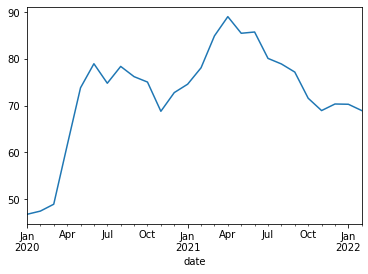

In [16]:
(patient_data['total_sales'] / 1_000_000).plot()

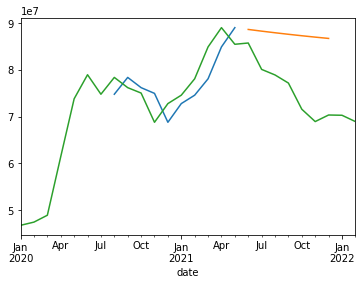

In [17]:
past_forecast_data.total_revenue.diff().plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

In [18]:
patient_data

,patients,sq788_tax,total_sales
date,,,
2020-01-01,235786,3271492,4.673560e+07
2020-02-01,247190,3319612,4.742303e+07
2020-03-01,258308,3422784,4.889691e+07
2020-04-01,271979,4301520,6.145029e+07
2020-05-01,282511,5168990,7.384271e+07
2020-06-01,297010,5529722,7.899603e+07
2020-07-01,313638,5237401,7.482001e+07
2020-08-01,329764,5489699,7.842427e+07
2020-09-01,342263,5336049,7.622927e+07


In [19]:
past_forecast_data

,excise_tax,total_revenue,revenue_forecast
date,,,
2020-07-01,5529722.0,7.899603e+07,NaN
2020-08-01,10767124.0,1.538161e+08,NaN
2020-09-01,16256823.0,2.322403e+08,NaN
2020-10-01,21592871.0,3.084696e+08,NaN
2020-11-01,26843058.0,3.834723e+08,NaN
2020-12-01,31659626.0,4.522804e+08,NaN
2021-01-01,36756588.0,5.250941e+08,NaN
2021-02-01,41979611.0,5.997087e+08,NaN
2021-03-01,47448462.0,6.778352e+08,NaN


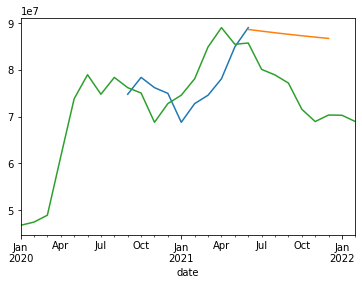

In [20]:
past_forecast_data.total_revenue.diff().shift(1).plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

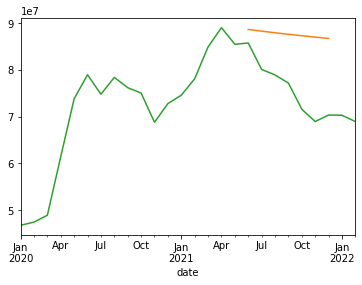

In [21]:
past_forecast_data.total_revenue.diff().shift(-11).plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

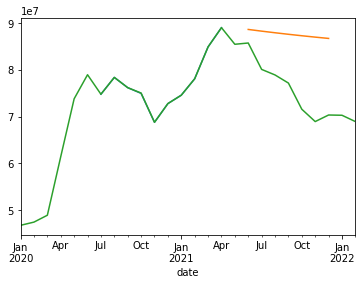

In [22]:
past_forecast_data.total_revenue.diff().shift(-1).plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

In [23]:
past_forecast_data.total_revenue.diff().shift(-1)

date
2020-07-01    7.482003e+07
2020-08-01    7.842427e+07
2020-09-01    7.622926e+07
2020-10-01    7.500267e+07
2020-11-01    6.880811e+07
2020-12-01    7.281374e+07
2021-01-01    7.461461e+07
2021-02-01    7.812644e+07
2021-03-01    8.495681e+07
2021-04-01    8.908563e+07
2021-05-01             NaN
2021-06-01             NaN
2021-07-01             NaN
2021-08-01             NaN
2021-09-01             NaN
2021-10-01             NaN
2021-11-01             NaN
2021-12-01             NaN
Name: total_revenue, dtype: float64

In [24]:
past_forecast_data

,excise_tax,total_revenue,revenue_forecast
date,,,
2020-07-01,5529722.0,7.899603e+07,NaN
2020-08-01,10767124.0,1.538161e+08,NaN
2020-09-01,16256823.0,2.322403e+08,NaN
2020-10-01,21592871.0,3.084696e+08,NaN
2020-11-01,26843058.0,3.834723e+08,NaN
2020-12-01,31659626.0,4.522804e+08,NaN
2021-01-01,36756588.0,5.250941e+08,NaN
2021-02-01,41979611.0,5.997087e+08,NaN
2021-03-01,47448462.0,6.778352e+08,NaN


In [25]:
patient_data

,patients,sq788_tax,total_sales
date,,,
2020-01-01,235786,3271492,4.673560e+07
2020-02-01,247190,3319612,4.742303e+07
2020-03-01,258308,3422784,4.889691e+07
2020-04-01,271979,4301520,6.145029e+07
2020-05-01,282511,5168990,7.384271e+07
2020-06-01,297010,5529722,7.899603e+07
2020-07-01,313638,5237401,7.482001e+07
2020-08-01,329764,5489699,7.842427e+07
2020-09-01,342263,5336049,7.622927e+07


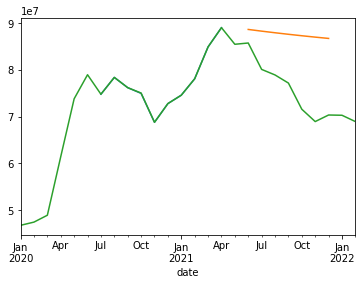

In [26]:
past_forecast_data.total_revenue.diff().shift(-1).plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

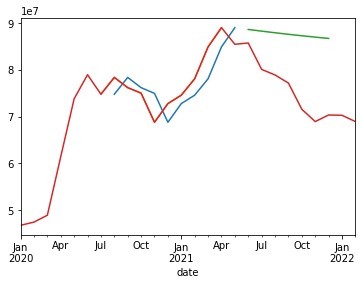

In [27]:
past_forecast_data.total_revenue.diff().plot()
past_forecast_data.total_revenue.diff().shift(-1).plot()
past_forecast_data.revenue_forecast.plot()
(patient_data['total_sales']).plot()

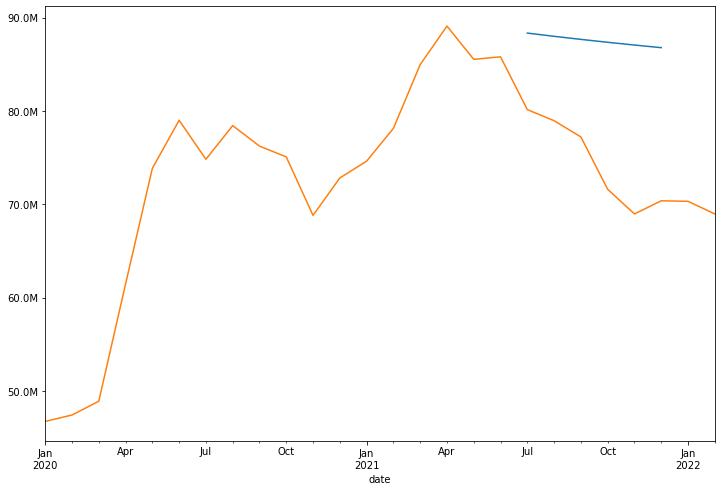

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
past_forecast.plot()
patient_data['total_sales'].plot()
yaxis_format = FuncFormatter(format_millions)
ax.yaxis.set_major_formatter(yaxis_format)
plt.show()

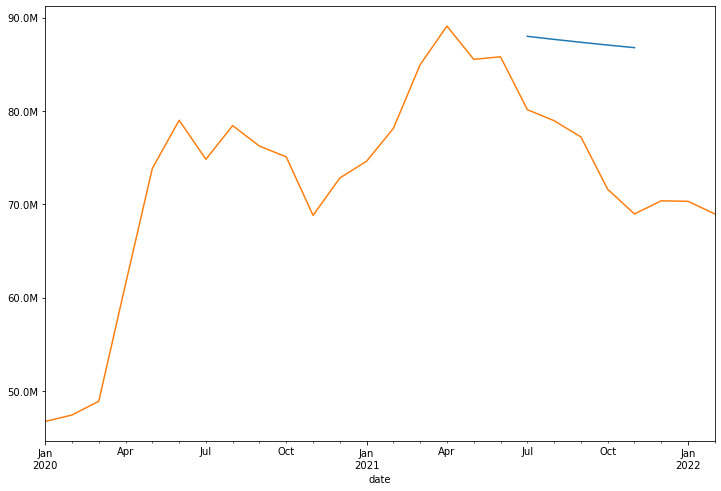

In [29]:
# Visualize the forecast.
fig, ax = plt.subplots(figsize=(12, 8))
past_forecast.shift(-1).plot()
patient_data['total_sales'].plot()
yaxis_format = FuncFormatter(format_millions)
ax.yaxis.set_major_formatter(yaxis_format)
plt.show()

In [30]:
past_forecast

date
2021-07-01    8.833617e+07
2021-08-01    8.799013e+07
2021-09-01    8.766191e+07
2021-10-01    8.735059e+07
2021-11-01    8.705531e+07
2021-12-01    8.677523e+07
Name: revenue_forecast, dtype: float64

In [31]:
patient_data.loc[patient_data['total_sales'] == patient_data['total_sales'].max()]

,patients,sq788_tax,total_sales
date,,,
2021-04-01,366815,6235995,8.908564e+07


In [32]:
def RMSE(actual, predicted):
    """Calculate the root mean squared error of a series given
    the actual and predicted values.
    Args:
        actual (Series): The actual timeseries.
        predicted (Series): The predicted timeseries.
    Returns:
        (float): The RMSE.
    ."""
    t = len(predicted)
    se = 0
    for index, y_hat in predicted.iteritems():
        y = actual.loc[index]
        se += (y - y_hat) ** 2
    rmse = np.sqrt(se * (1 / t))
    return rmse

In [33]:
def RMSE(actual, predicted):
    """Calculate the root mean squared error of a series given
    the actual and predicted values.
    Args:
        actual (Series): The actual timeseries.
        predicted (Series): The predicted timeseries.
    Returns:
        (float): The RMSE.
    ."""
    t = len(predicted)
    se = 0
    for index, y_hat in predicted.iteritems():
        y = actual.loc[index]
        se += (y - y_hat) ** 2
    rmse = np.sqrt(se * (1 / t))
    return rmse
# Calculate RMSE for Oklahoma revenue forecast.

past_RMSE = RMSE(patient_data['total_sales'], past_forecast)

In [34]:
past_RMSE

13555680.379772278

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=705.102, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=697.564, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=619.040, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=620.201, Time=1.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=621.247, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=698.013, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=632.293, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.010 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -306.520
Date:

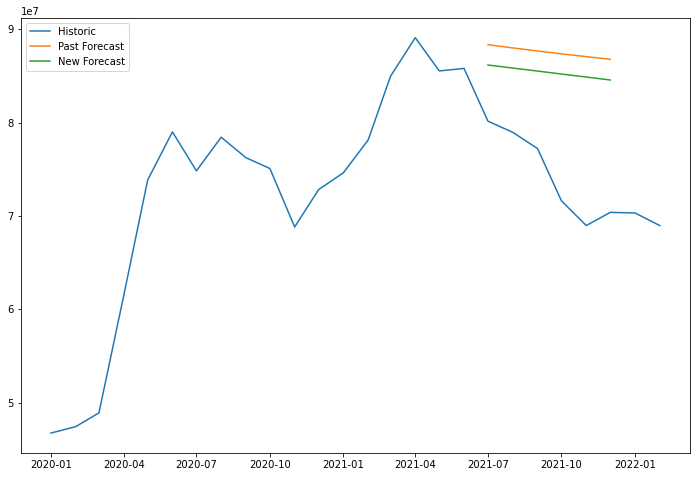

In [35]:
train = patient_data.loc[patient_data.index < past_forecast.index.min()]
arima_model = auto_arima(
    train['total_sales'],
    start_p=0,
    d=0,
    start_q=0, 
    max_p=6,
    max_d=6,
    max_q=6,
    seasonal=False, 
    error_action='warn',
    trace=True,
    supress_warnings=True,
    stepwise=True,
)

print(arima_model.summary())
insample_forecast = pd.DataFrame(
    arima_model.predict(n_periods=len(past_forecast)),
    index=past_forecast.index
)

insample_forecast.columns = ['insample_forecast']
new_forecast = insample_forecast['insample_forecast']
# Plot the forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(past_forecast, label='Past Forecast')
plt.plot(new_forecast, label='New Forecast')
plt.legend(loc='best')
plt.show()

In [36]:
new_RMSE = RMSE(patient_data['total_sales'], new_forecast)
print('Better model:', past_RMSE > new_RMSE)

Better model: True


In [37]:
patient_data

,patients,sq788_tax,total_sales
date,,,
2020-01-01,235786,3271492,4.673560e+07
2020-02-01,247190,3319612,4.742303e+07
2020-03-01,258308,3422784,4.889691e+07
2020-04-01,271979,4301520,6.145029e+07
2020-05-01,282511,5168990,7.384271e+07
2020-06-01,297010,5529722,7.899603e+07
2020-07-01,313638,5237401,7.482001e+07
2020-08-01,329764,5489699,7.842427e+07
2020-09-01,342263,5336049,7.622927e+07


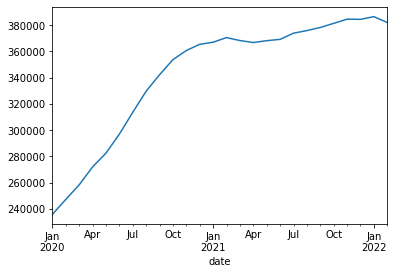

In [38]:
patient_data['patients'].plot()

In [39]:
t = range(0, len(patient_data))
population_data = pd.DataFrame({
    'population': monthly_population,
    't': t[:len(monthly_population)],
})

regression = sm.formula.ols(formula='population ~ t', data=population_data).fit()
population_trend = regression.params['t']
trend = pd.DataFrame(sm.add_constant(t), columns=['const', 't'])
population_forecast = regression.predict(trend)
population_forecast.index = patient_data.index

NameError: name 'monthly_population' is not defined

In [40]:
config = dotenv_values('../.env')
fred_api_key = config['FRED_API_KEY']
population = get_state_population(fred_api_key, 'OK', '2020-01-01')
monthly_index = population.resample('M').mean().index
monthly_population = pd.Series(
    np.linspace(3962031.0, 3986639.0, len(monthly_index)),
    index=monthly_index,
)

In [41]:
population

2020-01-01    3962031
2021-01-01    3986639
dtype: int64

In [42]:
3986639 - 3962031

24608

In [43]:
monthly_index = population.resample('M').mean().index
monthly_population = pd.Series(
    np.linspace(3962031.0, 3986639.0, len(monthly_index)),
    index=monthly_index,
)

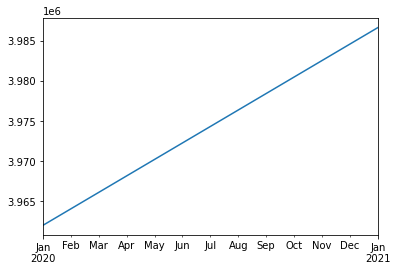

In [44]:
monthly_population.plot()

In [45]:
t = range(0, len(patient_data))
population_data = pd.DataFrame({
    'population': monthly_population,
    't': t[:len(monthly_population)],
})

regression = sm.formula.ols(formula='population ~ t', data=population_data).fit()
population_trend = regression.params['t']
trend = pd.DataFrame(sm.add_constant(t), columns=['const', 't'])
population_forecast = regression.predict(trend)
population_forecast.index = patient_data.index

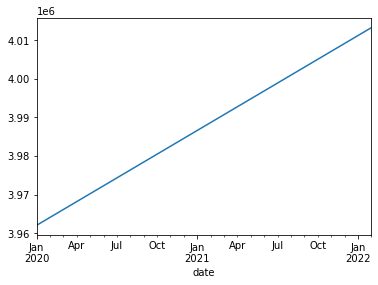

In [46]:
population_forecast.plot()

In [47]:
trend

,const,t
0,1.0,0.0
1,1.0,1.0
2,1.0,2.0
3,1.0,3.0
4,1.0,4.0
5,1.0,5.0
6,1.0,6.0
7,1.0,7.0
8,1.0,8.0
9,1.0,9.0


In [48]:
regression.params.t

2050.666666666626

In [49]:
participation = patient_data['patients'].div(population_forecast)

In [50]:
participation

date
2020-01-01    0.059511
2020-02-01    0.062357
2020-03-01    0.065128
2020-04-01    0.068540
2020-05-01    0.071157
2020-06-01    0.074771
2020-07-01    0.078916
2020-08-01    0.082931
2020-09-01    0.086030
2020-10-01    0.088883
2020-11-01    0.090581
2020-12-01    0.091719
2021-01-01    0.092071
2021-02-01    0.092910
2021-03-01    0.092296
2021-04-01    0.091869
2021-05-01    0.092173
2021-06-01    0.092384
2021-07-01    0.093510
2021-08-01    0.093958
2021-09-01    0.094506
2021-10-01    0.095236
2021-11-01    0.095990
2021-12-01    0.095905
2022-01-01    0.096369
2022-02-01    0.095201
dtype: float64

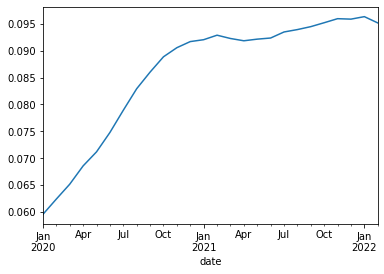

In [51]:
participation.plot()

NameError: name 'var_forecast' is not defined

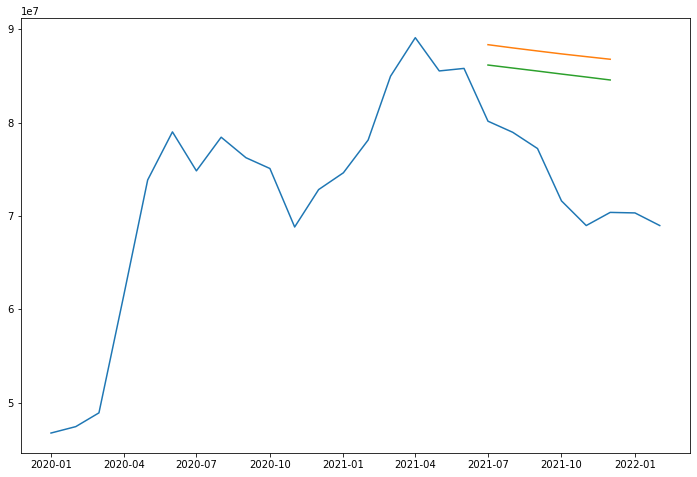

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(past_forecast, label='Past Forecast')
plt.plot(new_forecast, label='New Forecast')
plt.plot(var_forecast['revenue_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# Plot the patients forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(participation, label='Historic Participation')
plt.plot(var_forecast['participation_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# See if including more data makes a better prediction.

var_RMSE = RMSE(patient_data['total_sales'], var_forecast['revenue_forecast'])
print('Better model:', past_RMSE > new_RMSE  > var_RMSE)

In [53]:
horizon = len(past_forecast)
lag_order = results.k_ar
var_forecast = results.forecast(vector[-lag_order:], horizon)
var_forecast = pd.DataFrame(
    var_forecast,
    columns=['revenue_forecast', 'participation_forecast']
)

var_forecast.index = past_forecast.index
# Plot the sales forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(past_forecast, label='Past Forecast')
plt.plot(new_forecast, label='New Forecast')
plt.plot(var_forecast['revenue_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# Plot the patients forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(participation, label='Historic Participation')
plt.plot(var_forecast['participation_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# See if including more data makes a better prediction.

var_RMSE = RMSE(patient_data['total_sales'], var_forecast['revenue_forecast'])
print('Better model:', past_RMSE > new_RMSE  > var_RMSE)

NameError: name 'results' is not defined

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Apr, 2022
Time:                     11:33:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    17.6158
Nobs:                     17.0000    HQIC:                   17.3510
Log likelihood:          -189.479    FPE:                3.35723e+07
AIC:                      17.3217    Det(Omega_mle):     2.42560e+07
--------------------------------------------------------------------
Results for equation y1
           coefficient        std. error           t-stat            prob
-------------------------------------------------------------------------
const  12978454.960021    8601690.608269            1.509           0.131
L1.y1         0.781271          0.170367            4.586           0.000
L1.y2  61049154.060896  185421985.644034            0.329           0.742

Results for equa

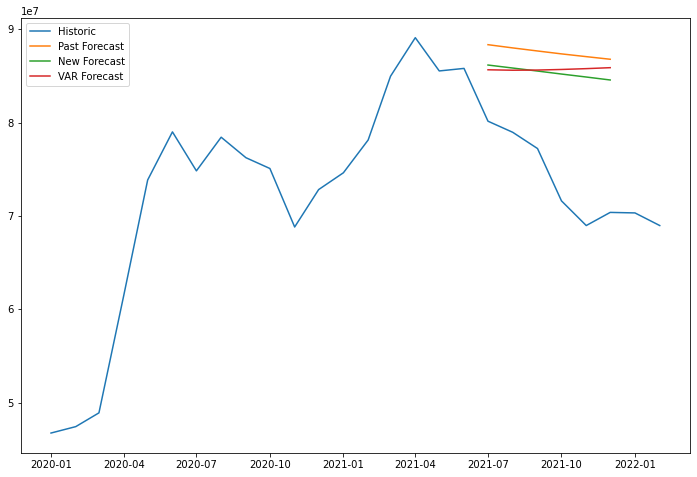

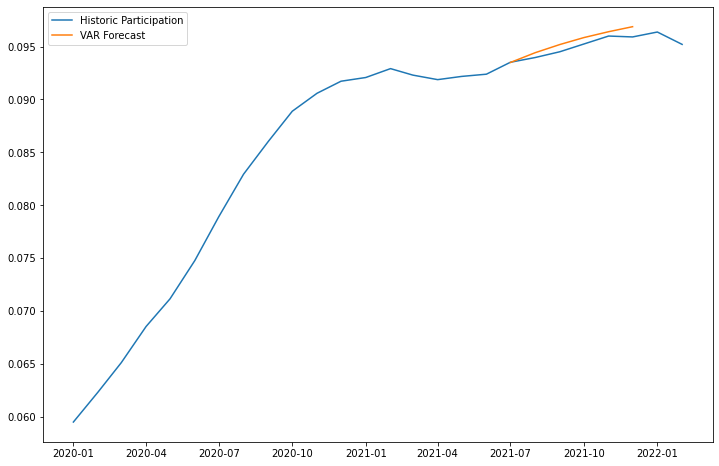

Better model: False


In [54]:
variables = [
    train['total_sales'],
    participation.loc[participation.index <= train.index.max()],
]

vector = np.column_stack(variables)
model = VAR(vector)
results = model.fit(1)
print(results.summary())
# FIXME: Fit the best in-sample predicting VAR.
# model.select_order(6)
# results = model.fit(ic='bic')
# Create a forecast.

horizon = len(past_forecast)
lag_order = results.k_ar
var_forecast = results.forecast(vector[-lag_order:], horizon)
var_forecast = pd.DataFrame(
    var_forecast,
    columns=['revenue_forecast', 'participation_forecast']
)

var_forecast.index = past_forecast.index
# Plot the sales forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(past_forecast, label='Past Forecast')
plt.plot(new_forecast, label='New Forecast')
plt.plot(var_forecast['revenue_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# Plot the patients forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(participation, label='Historic Participation')
plt.plot(var_forecast['participation_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()
# See if including more data makes a better prediction.

var_RMSE = RMSE(patient_data['total_sales'], var_forecast['revenue_forecast'])
print('Better model:', past_RMSE > new_RMSE  > var_RMSE)

In [55]:
from fredapi import Fred
# Get Fed interest rate.

fred = Fred(api_key=fred_api_key)
interest_rate = fred.get_series('FEDFUNDS', observation_start='2020-01-01')
# Get the CPI and calculate the national inflation rate.

cpi = fred.get_series('CPIAUCSL', observation_start='2019-12-01')
inflation = cpi.pct_change()[1:] * 100

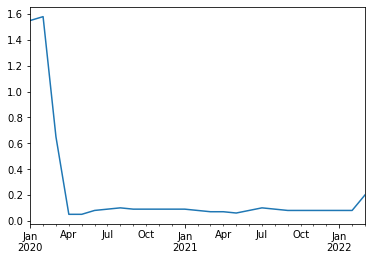

In [56]:
interest_rate.plot()

In [57]:
interest_rate

2020-01-01    1.55
2020-02-01    1.58
2020-03-01    0.65
2020-04-01    0.05
2020-05-01    0.05
2020-06-01    0.08
2020-07-01    0.09
2020-08-01    0.10
2020-09-01    0.09
2020-10-01    0.09
2020-11-01    0.09
2020-12-01    0.09
2021-01-01    0.09
2021-02-01    0.08
2021-03-01    0.07
2021-04-01    0.07
2021-05-01    0.06
2021-06-01    0.08
2021-07-01    0.10
2021-08-01    0.09
2021-09-01    0.08
2021-10-01    0.08
2021-11-01    0.08
2021-12-01    0.08
2022-01-01    0.08
2022-02-01    0.08
2022-03-01    0.20
dtype: float64

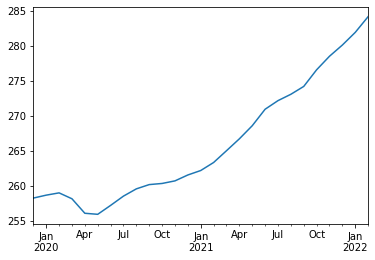

In [58]:
cpi.plot()

In [59]:
inflation = cpi.pct_change()[1:] * 100

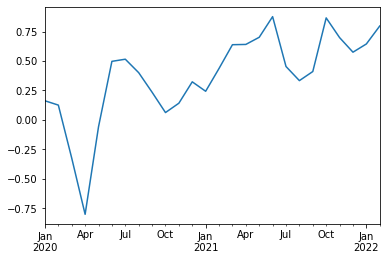

In [60]:
inflation.plot()

In [61]:
inflation.mean()

0.36919171636667614

In [62]:
inflation

2020-01-01    0.162238
2020-02-01    0.125637
2020-03-01   -0.325088
2020-04-01   -0.802200
2020-05-01   -0.058572
2020-06-01    0.497374
2020-07-01    0.515518
2020-08-01    0.401094
2020-09-01    0.234995
2020-10-01    0.062262
2020-11-01    0.141731
2020-12-01    0.323334
2021-01-01    0.243153
2021-02-01    0.437071
2021-03-01    0.638703
2021-04-01    0.641064
2021-05-01    0.701841
2021-06-01    0.877144
2021-07-01    0.453581
2021-08-01    0.333598
2021-09-01    0.410851
2021-10-01    0.866477
2021-11-01    0.699230
2021-12-01    0.575175
2022-01-01    0.645067
2022-02-01    0.797707
dtype: float64

In [63]:
variables = [
    train['total_sales'],
    participation.loc[participation.index <= train.index.max()],
    interest_rate.loc[interest_rate.index <= train.index.max()],
    inflation.loc[inflation.index <= train.index.max()],
]

vector = np.column_stack(variables)
model = VAR(vector)
results = model.fit(1)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Apr, 2022
Time:                     11:40:51
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    10.5482
Nobs:                     17.0000    HQIC:                   9.66534
Log likelihood:          -157.815    FPE:                    15359.7
AIC:                      9.56790    Det(Omega_mle):         5476.30
--------------------------------------------------------------------
Results for equation y1
           coefficient        std. error           t-stat            prob
-------------------------------------------------------------------------
const  39639780.128320   26525081.372550            1.494           0.135
L1.y1         0.510513          0.314889            1.621           0.105
L1.y2   6242592.659013  172082402.567788            0.036           0.971
L1.y3  -9896541.7

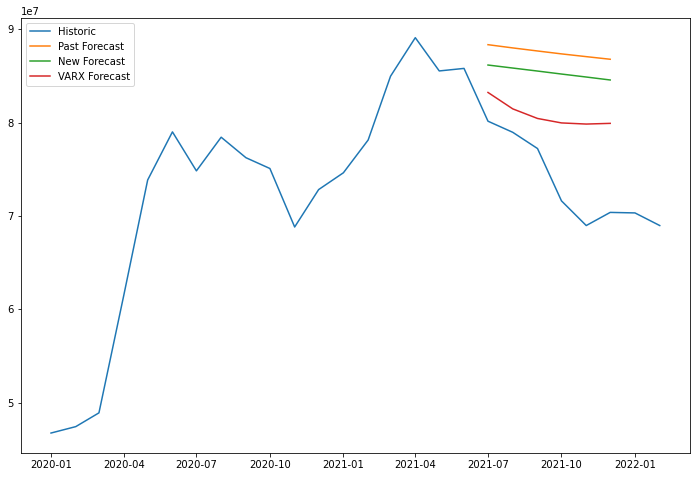

In [64]:
horizon = len(past_forecast)
lag_order = results.k_ar
varx_forecast = results.forecast(vector[-lag_order:], horizon)
varx_forecast = pd.DataFrame(
    varx_forecast,
    columns=[
        'revenue_forecast',
        'participation_forecast',
        'interest_rate_forecast',
        'inflation_forecast',
    ]
)

varx_forecast.index = past_forecast.index
# Plot the sales forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(past_forecast, label='Past Forecast')
plt.plot(new_forecast, label='New Forecast')
plt.plot(varx_forecast['revenue_forecast'], label='VARX Forecast')
plt.legend(loc='best')
plt.show()

In [65]:
varx_RMSE = RMSE(patient_data['total_sales'], varx_forecast['revenue_forecast'])
print('Better model:', past_RMSE > new_RMSE  > varx_RMSE)

Better model: True


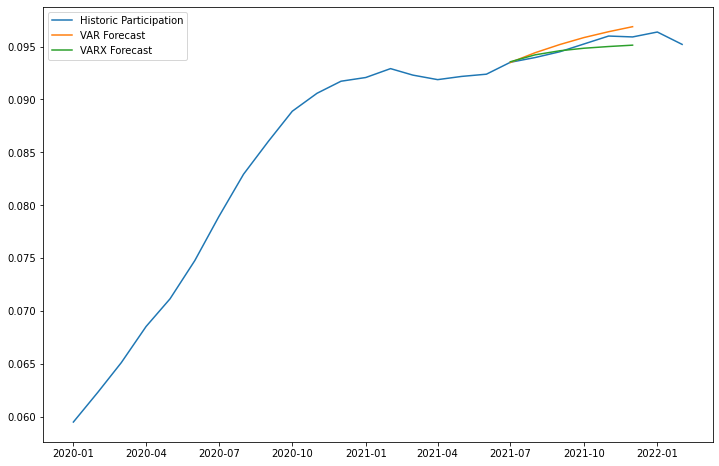

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(participation, label='Historic Participation')
plt.plot(var_forecast['participation_forecast'], label='VAR Forecast')
plt.plot(varx_forecast['participation_forecast'], label='VARX Forecast')
plt.legend(loc='best')
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Apr, 2022
Time:                     11:44:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    10.2623
Nobs:                     25.0000    HQIC:                   9.55768
Log likelihood:          -237.984    FPE:                    11037.9
AIC:                      9.28723    Det(Omega_mle):         5323.08
--------------------------------------------------------------------
Results for equation y1
            coefficient        std. error           t-stat            prob
--------------------------------------------------------------------------
const   29873422.345495   16390240.200747            1.823           0.068
L1.y1          0.747935          0.145989            5.123           0.000
L1.y2  -90181001.478059  133870118.652121           -0.674           0.501
L1.y3   -651

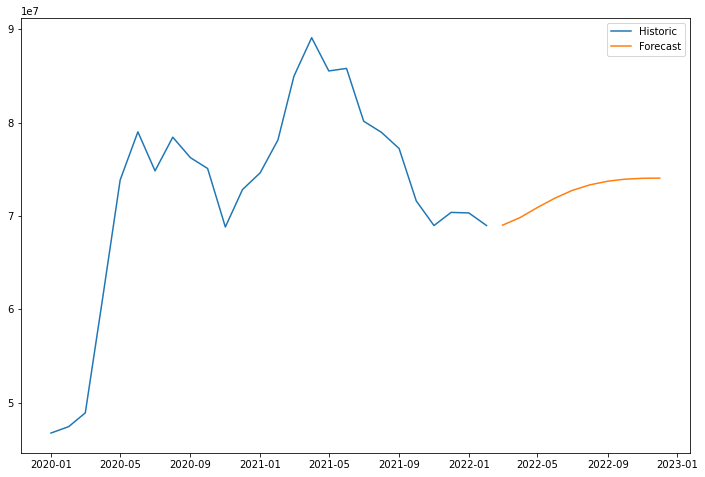

In [67]:
variables = [
    patient_data['total_sales'],
    participation.loc[participation.index <= patient_data.index.max()],
    interest_rate.loc[interest_rate.index <= patient_data.index.max()],
    inflation.loc[inflation.index <= patient_data.index.max()],
]

vector = np.column_stack(variables)
model = VAR(vector)
results = model.fit(1)
print(results.summary())
# Create a forecast.

horizon = 10
lag_order = results.k_ar
final_forecast = results.forecast(vector[-lag_order:], horizon)
final_forecast = pd.DataFrame(
    final_forecast,
    columns=[
        'revenue_forecast',
        'participation_forecast',
        'interest_rate_forecast',
        'inflation_forecast',
    ]
)

final_forecast.index = pd.date_range(
    start='2022-03-01',
    end='2022-12-01',
    freq='MS'
)
# Plot the sales forecasts.

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(patient_data['total_sales'], label='Historic')
plt.plot(final_forecast['revenue_forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

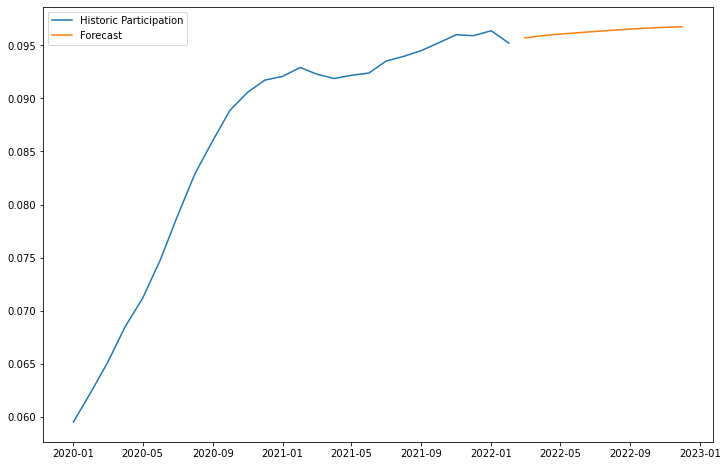

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(participation, label='Historic Participation')
plt.plot(final_forecast['participation_forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [69]:
forecast_2022 = final_forecast.revenue_forecast.sum() + \
                patient_data.loc[patient_data.index >= '2022-01-01']['total_sales'].sum()

print('Predicted OK Sales in 2022:', format_millions(forecast_2022))

Predicted OK Sales in 2022: 862.7M


In [70]:
patient_data.loc[
    (patient_data.index >= '2021-01-01') &
    (patient_data.index < '2022-01-01')
]['total_sales']

date
2021-01-01    7.461461e+07
2021-02-01    7.812644e+07
2021-03-01    8.495681e+07
2021-04-01    8.908564e+07
2021-05-01    8.552333e+07
2021-06-01    8.579450e+07
2021-07-01    8.013937e+07
2021-08-01    7.894991e+07
2021-09-01    7.721161e+07
2021-10-01    7.160506e+07
2021-11-01    6.896207e+07
2021-12-01    7.037004e+07
Name: total_sales, dtype: float64

In [71]:
patient_data.loc[
    (patient_data.index >= '2021-01-01') &
    (patient_data.index < '2022-01-01')
]['total_sales'].sum()

945339414.2857143

In [72]:
patient_data.loc[
    (patient_data.index >= '2021-01-01') &
    (patient_data.index < '2022-01-01')
]['total_sales'].sum() / 1_000_000

945.3394142857143

In [73]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
